# Assignment week 10 RNN

Name: Srinidhi Acharla

In [17]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [18]:
df = pd.read_csv('C:/Users/Srinidhi/Documents/USF/Data_Science_Programming/week10_assignment/LTC-USD.csv',  parse_dates=True)

In [19]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-02,115.404503,115.882263,108.436996,108.556023,108.556023,743395485
1,2022-02-03,108.534653,110.287003,106.417969,110.287003,110.287003,683428425
2,2022-02-04,110.291100,120.922211,109.004990,120.918037,120.918037,953726676
3,2022-02-05,120.923294,123.394882,119.245705,121.916740,121.916740,736360985
4,2022-02-06,121.919350,127.445503,121.427155,127.445503,127.445503,782675364
...,...,...,...,...,...,...,...
445,2023-04-23,87.098724,87.130852,84.923111,86.897324,86.897324,382921210
446,2023-04-24,86.884995,88.882362,86.374855,88.407341,88.407341,516200917
447,2023-04-25,88.402985,91.654968,87.416229,91.108345,91.108345,614049406
448,2023-04-26,91.107857,93.802841,85.433022,88.254189,88.254189,798720366


In [20]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [21]:
closing_price = df["Close"][-100:] #Here I am trying to collect the closing prices for the past 60 days

In [22]:

df = pd.DataFrame({'Date': closing_price.index, 'ClosePrice': closing_price.values}) #storing the values of the Date and the closing price into the pandas dataframe
df

,Date,ClosePrice
0,350,82.775330
1,351,84.232269
2,352,90.493225
3,353,88.314651
4,354,87.629974
...,...,...
95,445,86.897324
96,446,88.407341
97,447,91.108345
98,448,88.254189


# Reshape the data

In [23]:
df.shape[0]/10 #Here I reshape the data

10.0

In [24]:
df.groupby(['Date']).count() #Grouping by the date

,ClosePrice
Date,
350,1
351,1
352,1
353,1
354,1
...,...
445,1
446,1
447,1


In [25]:
# Find the reading cost price for each day

df_count = pd.DataFrame(df.groupby(['Date']).count()['ClosePrice'])

df_count

,ClosePrice
Date,
350,1
351,1
352,1
353,1
354,1
...,...
445,1
446,1
447,1


In [27]:
# Re-organize the data set by day

temp = np.array(df['ClosePrice']).reshape(10,10)

temp

array([[ 82.77533 ,  84.232269,  90.493225,  88.314651,  87.629974,
         90.025925,  87.202881,  89.381012,  87.589455,  88.84581 ],
       [ 89.601936,  95.050056,  91.262436,  94.308113, 100.443626,
         98.690186,  99.970924,  98.614479,  96.458755,  96.062454],
       [100.927666,  99.207619,  92.098465,  93.529282,  94.43055 ,
         92.395737,  91.12175 ,  95.687576, 102.795303,  98.952202],
       [100.309509,  99.791847,  97.564217,  95.940819,  93.70948 ,
         95.218925,  94.691994,  91.555099,  93.263451,  95.255623],
       [ 94.086678,  93.792778,  97.737663,  95.25724 ,  90.548973,
         89.289536,  89.953346,  87.42292 ,  86.301903,  82.783531],
       [ 76.731049,  71.762215,  69.706955,  76.311844,  81.768288,
         84.35054 ,  76.428154,  79.053551,  85.502319,  82.983742],
       [ 84.436096,  78.424553,  82.735352,  87.356888,  93.701004,
         93.709908,  91.581146,  93.525192,  89.246872,  89.139374],
       [ 91.341736,  89.059891,  89.68412

In [28]:
# Convert to dataframe

conv_df = pd.DataFrame(temp, columns=np.arange(0,10,1))

conv_df

,0,1,2,3,4,5,6,7,8,9
0,82.775330,84.232269,90.493225,88.314651,87.629974,90.025925,87.202881,89.381012,87.589455,88.845810
1,89.601936,95.050056,91.262436,94.308113,100.443626,98.690186,99.970924,98.614479,96.458755,96.062454
2,100.927666,99.207619,92.098465,93.529282,94.430550,92.395737,91.121750,95.687576,102.795303,98.952202
3,100.309509,99.791847,97.564217,95.940819,93.709480,95.218925,94.691994,91.555099,93.263451,95.255623
4,94.086678,93.792778,97.737663,95.257240,90.548973,89.289536,89.953346,87.422920,86.301903,82.783531
5,76.731049,71.762215,69.706955,76.311844,81.768288,84.350540,76.428154,79.053551,85.502319,82.983742
6,84.436096,78.424553,82.735352,87.356888,93.701004,93.709908,91.581146,93.525192,89.246872,89.139374
7,91.341736,89.059891,89.684128,92.875351,93.015976,93.037338,92.600426,92.622116,90.929153,90.638329
8,89.975197,90.676674,93.821228,94.311798,92.504158,94.259499,96.451973,96.868210,100.267448,98.674698
9,101.851418,90.440681,90.239655,85.517342,87.098526,86.897324,88.407341,91.108345,88.254189,89.129784


# Reshape for Standardizing Data

In [29]:
row_count = df.shape[0] # store the number of obersvations (daily stock price readings)
row_count

100

In [30]:
# Let's create a single sequence (i.e., feature) for standardization

temp_1feature = np.array(conv_df).ravel().reshape(-1,1)

temp_1feature.shape

(100, 1)

In [31]:
temp_1feature

array([[ 82.77533 ],
       [ 84.232269],
       [ 90.493225],
       [ 88.314651],
       [ 87.629974],
       [ 90.025925],
       [ 87.202881],
       [ 89.381012],
       [ 87.589455],
       [ 88.84581 ],
       [ 89.601936],
       [ 95.050056],
       [ 91.262436],
       [ 94.308113],
       [100.443626],
       [ 98.690186],
       [ 99.970924],
       [ 98.614479],
       [ 96.458755],
       [ 96.062454],
       [100.927666],
       [ 99.207619],
       [ 92.098465],
       [ 93.529282],
       [ 94.43055 ],
       [ 92.395737],
       [ 91.12175 ],
       [ 95.687576],
       [102.795303],
       [ 98.952202],
       [100.309509],
       [ 99.791847],
       [ 97.564217],
       [ 95.940819],
       [ 93.70948 ],
       [ 95.218925],
       [ 94.691994],
       [ 91.555099],
       [ 93.263451],
       [ 95.255623],
       [ 94.086678],
       [ 93.792778],
       [ 97.737663],
       [ 95.25724 ],
       [ 90.548973],
       [ 89.289536],
       [ 89.953346],
       [ 87.4

## Standardize the values

In [32]:
# Next, standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

temp_std = scaler.fit_transform(temp_1feature)

## Reshape the data back to 10 day format

In [33]:
temp_reshaped = temp_std.reshape(10,10)

temp_reshaped.shape

(10, 10)

In [34]:
# Pandas version of the reshaped data

pd.DataFrame(temp_reshaped, columns=np.arange(0,10,1))

,0,1,2,3,4,5,6,7,8,9
0,-1.286104,-1.056490,-0.069766,-0.413108,-0.521013,-0.143412,-0.588323,-0.245050,-0.527399,-0.329398
1,-0.210233,0.648389,0.051462,0.531459,1.498414,1.222073,1.423917,1.210141,0.870400,0.807943
2,1.574699,1.303620,0.183220,0.408716,0.550756,0.230070,0.029290,0.748862,1.869038,1.263366
3,1.477278,1.395694,1.044620,0.788773,0.437115,0.675003,0.591959,0.097585,0.366821,0.680787
4,0.496561,0.450243,1.071956,0.681042,-0.060980,-0.259467,-0.154850,-0.553645,-0.730317,-1.284811
5,-2.238680,-3.021767,-3.345675,-2.304747,-1.444813,-1.037851,-2.286417,-1.872655,-0.856331,-1.253258
6,-1.024367,-1.971785,-1.292404,-0.564051,0.435779,0.437183,0.101690,0.408071,-0.266191,-0.283132
7,0.063959,-0.295659,-0.197279,0.305657,0.327819,0.331186,0.262329,0.265747,-0.001064,-0.046897
8,-0.151407,-0.040854,0.454727,0.532040,0.247157,0.523798,0.869331,0.934930,1.470649,1.219632
9,1.720282,-0.078047,-0.109728,-0.853963,-0.604769,-0.636479,-0.398500,0.027177,-0.422637,-0.284644


# Split the Data

**In certain cases, we cannot use a random split. For example, if we are trying to predict the stock market, we cannot use a random split. We need to use a chronological split.**

BUT, keep in mind if we have something like hourly readings of dayly temperature, we can use a random split on days, but the sequence of the temperature within the day is important to remain sequential.

In this case, we are using a random spli because each day as an independent sample.

In [35]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(temp_reshaped, test_size=0.3)

# if we neede to maintain the ordering of the data, we can use the following code to split the data
#split_point = int(len(temp_reshaped)*0.7)
#train, test = temp_reshaped[:split_point], temp_reshaped[split_point:]

In [36]:
train.shape

(7, 10)

In [37]:
train[:2]

array([[-1.28610355e+00, -1.05649041e+00, -6.97656843e-02,
        -4.13108273e-01, -5.21013157e-01, -1.43412020e-01,
        -5.88322882e-01, -2.45050109e-01, -5.27398939e-01,
        -3.29397779e-01],
       [ 6.39593870e-02, -2.95658680e-01, -1.97279121e-01,
         3.05656637e-01,  3.27819094e-01,  3.31185738e-01,
         2.62328542e-01,  2.65746879e-01, -1.06356624e-03,
        -4.68973387e-02]])

In [38]:
test.shape

(3, 10)

In [39]:
test[:2]

array([[-0.15140674, -0.04085418,  0.45472656,  0.53204024,  0.24715673,
         0.52379793,  0.86933116,  0.93492998,  1.47064884,  1.21963193],
       [-0.21023256,  0.64838947,  0.05146173,  0.53145949,  1.49841444,
         1.22207284,  1.42391675,  1.21014144,  0.8704    ,  0.80794308]])

# Create Input and Target values

The first 9 days will be input to predict the 10th day reading (i.e., target)

In [40]:
# The first 9 columns (from 0 to 8) are inputs

train_inputs = train[:,:9]


pd.DataFrame(train_inputs, columns=np.arange(0,9,1))

,0,1,2,3,4,5,6,7,8
0,-1.286104,-1.056490,-0.069766,-0.413108,-0.521013,-0.143412,-0.588323,-0.245050,-0.527399
1,0.063959,-0.295659,-0.197279,0.305657,0.327819,0.331186,0.262329,0.265747,-0.001064
2,1.574699,1.303620,0.183220,0.408716,0.550756,0.230070,0.029290,0.748862,1.869038
3,1.720282,-0.078047,-0.109728,-0.853963,-0.604769,-0.636479,-0.398500,0.027177,-0.422637
4,0.496561,0.450243,1.071956,0.681042,-0.060980,-0.259467,-0.154850,-0.553645,-0.730317
5,1.477278,1.395694,1.044620,0.788773,0.437115,0.675003,0.591959,0.097585,0.366821
6,-1.024367,-1.971785,-1.292404,-0.564051,0.435779,0.437183,0.101690,0.408071,-0.266191


## Add one more dimension to make it ready for RNNs

In [41]:
train_inputs

array([[-1.28610355e+00, -1.05649041e+00, -6.97656843e-02,
        -4.13108273e-01, -5.21013157e-01, -1.43412020e-01,
        -5.88322882e-01, -2.45050109e-01, -5.27398939e-01],
       [ 6.39593870e-02, -2.95658680e-01, -1.97279121e-01,
         3.05656637e-01,  3.27819094e-01,  3.31185738e-01,
         2.62328542e-01,  2.65746879e-01, -1.06356624e-03],
       [ 1.57469899e+00,  1.30362012e+00,  1.83219644e-01,
         4.08715960e-01,  5.50755519e-01,  2.30069619e-01,
         2.92896614e-02,  7.48862428e-01,  1.86903801e+00],
       [ 1.72028202e+00, -7.80466025e-02, -1.09728238e-01,
        -8.53963307e-01, -6.04769197e-01, -6.36478570e-01,
        -3.98500358e-01,  2.71770376e-02, -4.22637066e-01],
       [ 4.96561398e-01,  4.50242849e-01,  1.07195551e+00,
         6.81041607e-01, -6.09798167e-02, -2.59466699e-01,
        -1.54850448e-01, -5.53644803e-01, -7.30316736e-01],
       [ 1.47727764e+00,  1.39569427e+00,  1.04462047e+00,
         7.88773446e-01,  4.37115110e-01,  6.750031

In [42]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(7, 9, 1)

## Set the target

In [43]:
# The last column (9) is TARGET

train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,-0.329398
1,-0.046897
2,1.263366
3,-0.284644
4,-1.284811
5,0.680787
6,-0.283132


In [44]:
test.shape

(3, 10)

In [45]:
# The first 9 columns (from 0 to 8) are inputs

test_inputs = test[:,:9]

In [46]:
#Create an additional dimension for test

test_x = test_inputs[:,:,np.newaxis]

test_x.shape 

(3, 9, 1)

In [47]:
# The last column (9) is TARGET

test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,1.219632
1,0.807943
2,-1.253258


# simple RNN

In [48]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [49]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.5503
Epoch 2/30
1/1 [==============================] - 0s 13ms/step - loss: 0.5322
Epoch 3/30
1/1 [==============================] - 0s 31ms/step - loss: 0.5150
Epoch 4/30
1/1 [==============================] - 0s 22ms/step - loss: 0.4987
Epoch 5/30
1/1 [==============================] - 0s 32ms/step - loss: 0.4828
Epoch 6/30
1/1 [==============================] - 0s 14ms/step - loss: 0.4673
Epoch 7/30
1/1 [==============================] - 0s 9ms/step - loss: 0.4521
Epoch 8/30
1/1 [==============================] - 0s 15ms/step - loss: 0.4374
Epoch 9/30
1/1 [==============================] - 0s 10ms/step - loss: 0.4231
Epoch 10/30
1/1 [==============================] - 0s 8ms/step - loss: 0.4109
Epoch 11/30
1/1 [==============================] - 0s 11ms/step - loss: 0.3988
Epoch 12/30
1/1 [==============================] - 0s 23ms/step - loss: 0.3867
Epoch 13/30
1/1 [==============================] - 0s 55ms/step -

In [50]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 495ms/step


In [51]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [52]:
comparison

,actual,predicted
0,98.674698,93.678528
1,96.062454,92.019562
2,82.983742,85.351326


In [53]:
mean_squared_error(comparison['actual'], comparison['predicted'])

15.637382631385305

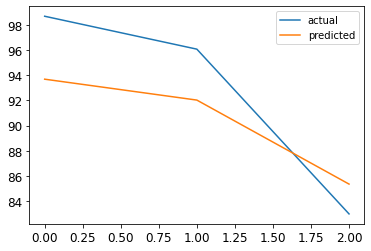

In [54]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with more layers

In [55]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [56]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.4927
Epoch 2/30
1/1 [==============================] - 0s 19ms/step - loss: 0.4858
Epoch 3/30
1/1 [==============================] - 0s 8ms/step - loss: 0.4790
Epoch 4/30
1/1 [==============================] - 0s 8ms/step - loss: 0.4722
Epoch 5/30
1/1 [==============================] - 0s 8ms/step - loss: 0.4654
Epoch 6/30
1/1 [==============================] - 0s 6ms/step - loss: 0.4585
Epoch 7/30
1/1 [==============================] - 0s 7ms/step - loss: 0.4517
Epoch 8/30
1/1 [==============================] - 0s 6ms/step - loss: 0.4449
Epoch 9/30
1/1 [==============================] - 0s 7ms/step - loss: 0.4380
Epoch 10/30
1/1 [==============================] - 0s 7ms/step - loss: 0.4311
Epoch 11/30
1/1 [==============================] - 0s 6ms/step - loss: 0.4241
Epoch 12/30
1/1 [==============================] - 0s 6ms/step - loss: 0.4171
Epoch 13/30
1/1 [==============================] - 0s 6ms/step - loss: 0.

In [57]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 281ms/step


In [58]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [59]:
comparison

,actual,predicted
0,98.674698,93.324219
1,96.062454,94.024704
2,82.983742,76.101227


In [60]:
mean_squared_error(comparison['actual'], comparison['predicted'])

26.716356245860982

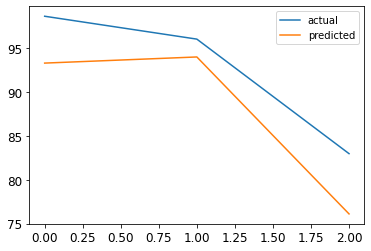

In [61]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# GRU (with more layers)

In [62]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [63]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 0.5844
Epoch 2/30
1/1 [==============================] - 0s 14ms/step - loss: 0.5510
Epoch 3/30
1/1 [==============================] - 0s 14ms/step - loss: 0.5321
Epoch 4/30
1/1 [==============================] - 0s 15ms/step - loss: 0.5184
Epoch 5/30
1/1 [==============================] - 0s 13ms/step - loss: 0.5056
Epoch 6/30
1/1 [==============================] - 0s 14ms/step - loss: 0.4932
Epoch 7/30
1/1 [==============================] - 0s 14ms/step - loss: 0.4810
Epoch 8/30
1/1 [==============================] - 0s 13ms/step - loss: 0.4690
Epoch 9/30
1/1 [==============================] - 0s 15ms/step - loss: 0.4570
Epoch 10/30
1/1 [==============================] - 0s 13ms/step - loss: 0.4451
Epoch 11/30
1/1 [==============================] - 0s 12ms/step - loss: 0.4332
Epoch 12/30
1/1 [==============================] - 0s 17ms/step - loss: 0.4211
Epoch 13/30
1/1 [==============================] - 0s 13ms/step

In [64]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 623ms/step


In [65]:
#Remember, these are standardized values. 

comparision = pd.DataFrame()

comparision['actual'] = scaler.inverse_transform([test_target]).flatten()
comparision['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [66]:
comparison

,actual,predicted
0,98.674698,93.324219
1,96.062454,94.024704
2,82.983742,76.101227


In [67]:
mean_squared_error(comparison['actual'], comparison['predicted'])

26.716356245860982

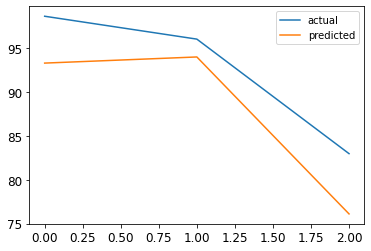

In [68]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Conv1D

In [69]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [70]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 0.5776
Epoch 2/30
1/1 [==============================] - 0s 14ms/step - loss: 0.5667
Epoch 3/30
1/1 [==============================] - 0s 26ms/step - loss: 0.5560
Epoch 4/30
1/1 [==============================] - 0s 16ms/step - loss: 0.5454
Epoch 5/30
1/1 [==============================] - 0s 27ms/step - loss: 0.5353
Epoch 6/30
1/1 [==============================] - 0s 29ms/step - loss: 0.5257
Epoch 7/30
1/1 [==============================] - 0s 30ms/step - loss: 0.5162
Epoch 8/30
1/1 [==============================] - 0s 150ms/step - loss: 0.5070
Epoch 9/30
1/1 [==============================] - 0s 29ms/step - loss: 0.4982
Epoch 10/30
1/1 [==============================] - 0s 16ms/step - loss: 0.4896
Epoch 11/30
1/1 [==============================] - 0s 18ms/step - loss: 0.4816
Epoch 12/30
1/1 [==============================] - 0s 24ms/step - loss: 0.4735
Epoch 13/30
1/1 [==============================] - 0s 24ms/ste

In [71]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 810ms/step


In [72]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [73]:
comparison

,actual,predicted
0,98.674698,93.081810
1,96.062454,93.795807
2,82.983742,78.758469


In [74]:
mean_squared_error(comparison['actual'], comparison['predicted'])

18.090340140526635

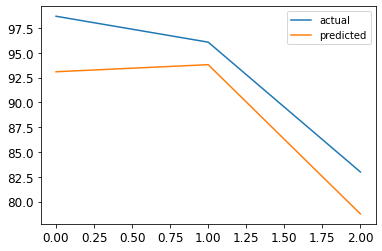

In [75]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Inference:
    
    From the above I have predicted the mean sqaured error and the actual and the 10 day predictions. From the above, just based of the MSE value, it can be clearly seen that the simple RNN is performing the best. It has the least mean squared error value of 0.38. As we start adding layers to it with LSTM, GRU etc, the error seems to increase. However it decreases with the conv1d but still out of all the models, the simple RNN is giving the best results so far but regardless, all the models are performing their best at predicting the stock prices with a very low mean sqaured error.